<a href="https://colab.research.google.com/github/RafsanJany-44/ACM/blob/master/ANN_Final%5B4%20nurons%5D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
#Loading Dataset
data = pd.read_csv("/content/drive/MyDrive/Thesis_Data/EEG_HMC_underscore.csv")

In [5]:
X = data.iloc[:, 1:76].values
Y = data.iloc[:, 0].values

In [6]:
#Encoding Categorical the sleep_stage
from sklearn.preprocessing import LabelEncoder
LE1 = LabelEncoder()
Y = np.array(LE1.fit_transform(Y))

In [7]:
#Encoding Categorical variable Geography
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct =ColumnTransformer(transformers=[('encoder',OneHotEncoder(),[1])],remainder="passthrough")
X = np.array(ct.fit_transform(X))

In [8]:
#Splitting dataset into training and testing dataset
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=0)

In [9]:
len(X_train)

86760

In [10]:
len(X_test)

21691

In [11]:
X_train.shape


(86760, 215)

In [18]:
model = keras.Sequential([
    keras.layers.Dense(250, input_shape=(215,), activation='relu'), # input layer
    keras.layers.Dense(150, activation='sigmoid'),
    keras.layers.Dense(100, activation='sigmoid'),
    #keras.layers.Dense(150, activation='sigmoid'),
    keras.layers.Dense(75, activation='softmax')                    # output layer
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=1000)

Epoch 1/1000
2712/2712 [==============================] - 18s 6ms/step - loss: 1.1759 - accuracy: 0.5188
Epoch 2/1000
2712/2712 [==============================] - 14s 5ms/step - loss: 0.9509 - accuracy: 0.6147
Epoch 3/1000
2712/2712 [==============================] - 9s 3ms/step - loss: 0.8955 - accuracy: 0.6412
Epoch 4/1000
2712/2712 [==============================] - 9s 3ms/step - loss: 0.8637 - accuracy: 0.6561
Epoch 5/1000
2712/2712 [==============================] - 8s 3ms/step - loss: 0.8364 - accuracy: 0.6675
Epoch 6/1000
2712/2712 [==============================] - 8s 3ms/step - loss: 0.8211 - accuracy: 0.6732
Epoch 7/1000
2712/2712 [==============================] - 8s 3ms/step - loss: 0.8090 - accuracy: 0.6786
Epoch 8/1000
2712/2712 [==============================] - 8s 3ms/step - loss: 0.7932 - accuracy: 0.6841
Epoch 9/1000
2712/2712 [==============================] - 9s 3ms/step - loss: 0.7839 - accuracy: 0.6873
Epoch 10/1000
2712/2712 [==============================] - 9s 

KeyboardInterrupt: ignored

In [ ]:
model.evaluate(X_test, y_test)

678/678 [==============================] - 2s 3ms/step - loss: 0.7376 - accuracy: 0.7203


[0.7376335859298706, 0.7203448414802551]

<font color='red' size='8'>A msg for RAHAT SIR:</font><br>
I did not change any syntex in next sections. It is just like the tensoreflow_NN.ipynb file, that you shared. 

#---------------------------------------------------------------
________________________________________________________________

Comparing Accuracy with RF and SVM (with different kernels):

In [ ]:
from sklearn.ensemble import RandomForestClassifier #ensemble is used if we have to use multiple algorithms 
model_rf = RandomForestClassifier(n_estimators=30) # n_estimators = number of random dicision trees 
model_rf.fit(X_train_flattened, y_train)

In [ ]:
model_rf.score(X_test_flattened, y_test)

In [ ]:
from sklearn.svm import SVC
model_svm = SVC()

In [ ]:
model_svm.fit(X_train_flattened, y_train)
model_svm.score(X_test_flattened, y_test)

In [ ]:
model_svm_poly = SVC(kernel='poly')
model_svm_poly.fit(X_train_flattened, y_train)
model_svm_poly.score(X_test_flattened, y_test)

In [ ]:
model_svm_rbf = SVC(kernel='rbf')
model_svm_rbf.fit(X_train_flattened, y_train)
model_svm_rbf.score(X_test_flattened, y_test)

<h2>Improve NN with scaling the features</h2>

In [ ]:
X_train = X_train / 255
X_test = X_test / 255
X_train[0]

In [ ]:
X_train_flattened_1 = X_train.reshape(len(X_train), 28*28)
X_test_flattened_1 = X_test.reshape(len(X_test), 28*28)
model.fit(X_train_flattened_1, y_train, epochs=5)

In [ ]:
model.fit(X_train_flattened_1, y_train, epochs=15)

In [ ]:
model.evaluate(X_test_flattened_1, y_test)

<h3>Now we try to draw the Confusion matrix</h3>
<p>Here, the NN will predict the test data considering each of the neurons. So, we need to find out the best neuron which is giving us the highest prediction.
    <br> In this case we have to use the argmax() function for those neurons. </p>

In [ ]:
y_predicted = model.predict(X_test_flattened_1)
y_predicted_labels = [np.argmax(i) for i in y_predicted]

**Now we need to draw the confusion matrix to show where our model is doing mistakes**
<br>
<br>
***Tensorflow has its own confusion matrix function where "labels" is the truth data and "predictions" is the predicted data***

In [ ]:
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)
cm

Text(69.0, 0.5, 'Truth')

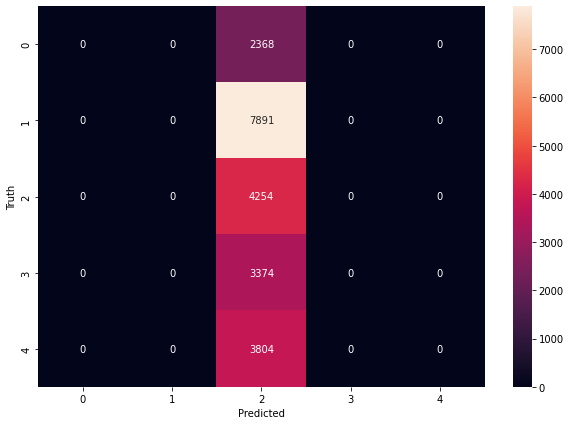

In [ ]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d') # here, cm is called to be visualized
plt.xlabel('Predicted')
plt.ylabel('Truth')

<h3>Add hidden layers in the NN to improve the accuracy</h3>
<p>What we will do here: <br>
    1. The first layer includes the input layer and hidden layer. The number of neurons in the hidden layer is fixed based on some trail and error <br>
    2. The last layer includes the output layer<br>
    3. layers are comma (,) separated
    
<b>Note: When the NN adds hidden layer, it will take more time to be trained</b>

</p>

In [ ]:
model = keras.Sequential([
    keras.layers.Dense(100, input_shape=(784,), activation='relu'), # input layer
    keras.layers.Dense(10, activation='sigmoid') # output layer
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train_flattened, y_train, epochs=5)

In [ ]:
model.fit(X_train_flattened, y_train, epochs=15)

In [ ]:
model.evaluate(X_test_flattened, y_test)

In [ ]:
y_predicted = model.predict(X_test_flattened)
y_predicted_labels = [np.argmax(i) for i in y_predicted]
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

<h3>Using Flatten layer so that we don't have to call .reshape function on input dataset</h3>

In [ ]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)), # input layer is reshaped and flattened
    keras.layers.Dense(100, activation='relu'), # input layer
    keras.layers.Dense(10, activation='sigmoid') # output layer
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=5)

Text(69.0, 0.5, 'Truth')

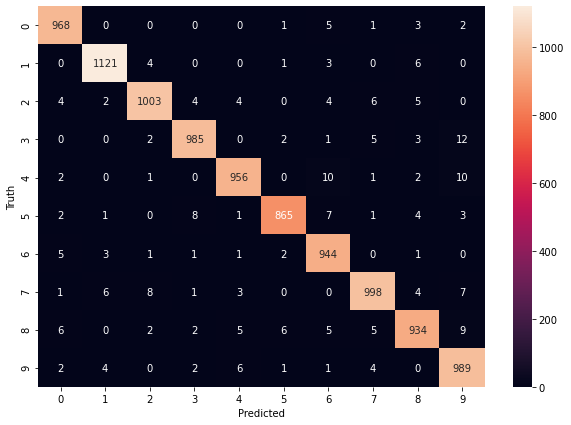

In [ ]:
y_predicted = model.predict(X_test)
y_predicted_labels = [np.argmax(i) for i in y_predicted]
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [ ]:
model.evaluate(X_test, y_test)